<a href="https://colab.research.google.com/github/kjregan120/cs668_capstone/blob/main/TEU_Growth_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files



uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)
df.head()


Saving Top_90_Ports_uploaded.xlsx to Top_90_Ports_uploaded.xlsx


,Rank,Country,Port Name,TEU 2020 (M),TEU 2021 (M),TEU 2022 (M),TEU 2023 (M),TEU 2024 (M) (est),Monthly Local Wage (USD),Median Home Value (USD),Growth 21_20,Growth 22_21,Growth 23_22,Growth 24_23,CAGR
0,1,China,Shanghai,43.50,47.03,47.30,49.16,50.00,1880,872555.0,0.081149,0.005741,0.039323,0.017087,0.035429
1,2,Singapore,Singapore,36.90,37.49,37.29,39.01,40.90,4100,874372.0,0.015989,-0.005335,0.046125,0.048449,0.026063
2,3,China,Ningbo–Zhoushan,28.72,31.07,33.35,35.30,39.30,1400,300000.0,0.081825,0.073383,0.058471,0.113314,0.081564
3,4,China,Shenzhen,26.55,28.77,30.04,29.88,30.70,1700,680283.0,0.083616,0.044143,-0.005326,0.027443,0.036975
4,5,China,Guangzhou,23.51,24.18,24.86,25.41,25.18,1500,420000.0,0.028499,0.028122,0.022124,-0.009052,0.017304


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      85 non-null     int64  
 1   Country                   85 non-null     object 
 2   Port Name                 85 non-null     object 
 3   TEU 2020 (M)              85 non-null     float64
 4   TEU 2021 (M)              83 non-null     float64
 5   TEU 2022 (M)              85 non-null     float64
 6   TEU 2023 (M)              85 non-null     float64
 7   TEU 2024 (M) (est)        85 non-null     float64
 8   Monthly Local Wage (USD)  85 non-null     int64  
 9   Median Home Value (USD)   84 non-null     float64
 10  Growth 21_20              85 non-null     float64
 11  Growth 22_21              83 non-null     float64
 12  Growth 23_22              85 non-null     float64
 13  Growth 24_23              85 non-null     float64
 14  CAGR        

In [ ]:
df.shape

(85, 15)

In [ ]:
median_2020 = df['TEU 2020 (M)'].median()
print("Median of column 2020 TEU:", median_2020)

median_2021 = df['TEU 2021 (M)'].median()
print("Median of column 2021 TEU:", median_2021)

median_2022 = df['TEU 2022 (M)'].median()
print("Median of column 2022 TEU:", median_2022)

median_2023 = df['TEU 2023 (M)'].median()
print("Median of column 2023 TEU:", median_2023)


Median of column 2020 TEU: 3.82
Median of column 2021 TEU: 4.0
Median of column 2022 TEU: 4.63
Median of column 2023 TEU: 4.57


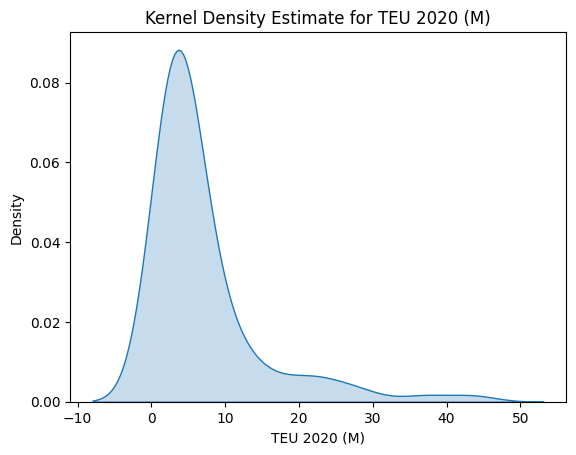

In [ ]:
sns.kdeplot(df['TEU 2020 (M)'], fill=True)

plt.title(f'Kernel Density Estimate for TEU 2020 (M)')
plt.xlabel('TEU 2020 (M)')
plt.ylabel('Density')
plt.show()

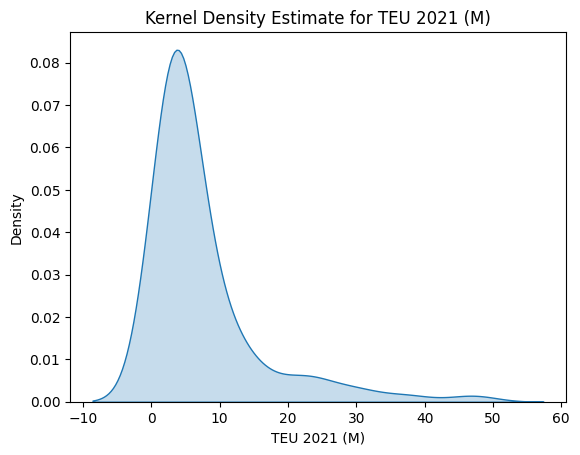

In [ ]:
sns.kdeplot(df['TEU 2021 (M)'], fill=True)


plt.title(f'Kernel Density Estimate for TEU 2021 (M)')
plt.xlabel('TEU 2021 (M)')
plt.ylabel('Density')
plt.show()

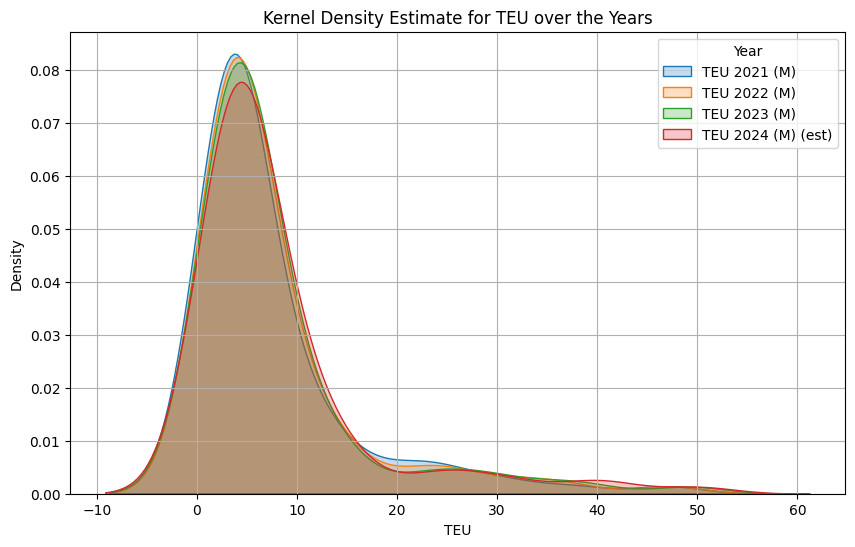

In [ ]:
columns_to_plot = ['TEU 2021 (M)', 'TEU 2022 (M)', 'TEU 2023 (M)', 'TEU 2024 (M) (est)']

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    sns.kdeplot(df[column], fill=True, label=column)

plt.title('Kernel Density Estimate for TEU over the Years')
plt.xlabel('TEU')
plt.ylabel('Density')
plt.legend(title='Year')
plt.grid(True)

plt.show()

In [ ]:
homevalue = df['Median Home Value (USD)'].median()
print("Median of column Home Value:", homevalue)

wage = df['Monthly Local Wage (USD)'].median()
print("Median of column Monthly Local Wage (USD):", wage)

homevalue = df['Median Home Value (USD)'].skew()
print("Skew of HOme value:", homevalue)

wage = df['Monthly Local Wage (USD)'].skew()
print("Skew of Local Wage (USD):", wage)


Median of column Home Value: 200000.0
Median of column Monthly Local Wage (USD): 1400.0
Skew of HOme value: 1.7876488976963436
Skew of Local Wage (USD): 0.932267875546601


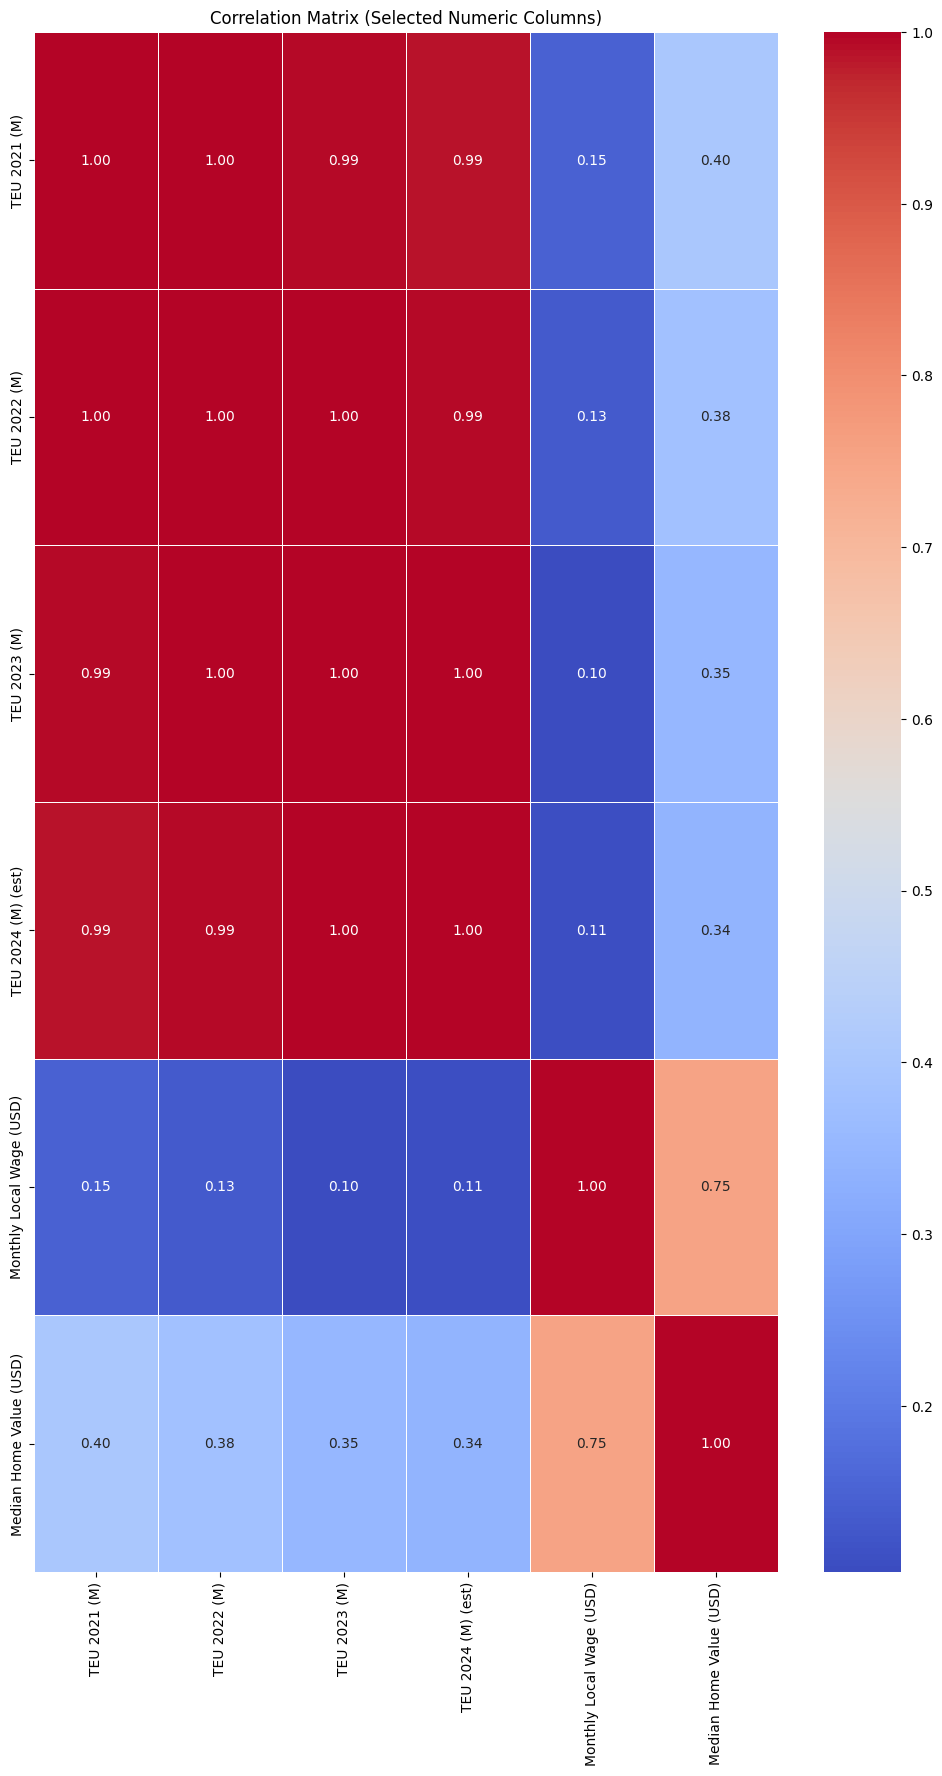

In [ ]:
numeric_columns = ['TEU 2021 (M)', 'TEU 2022 (M)', 'TEU 2023 (M)', 'TEU 2024 (M) (est)','Monthly Local Wage (USD)','Median Home Value (USD)']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix (Selected Numeric Columns)")
plt.show()

In [ ]:
df['Growth_21_20'] = ((df['TEU 2021 (M)'] - df['TEU 2020 (M)']) / df['TEU 2020 (M)']) * 100
df['Growth_22_21'] = ((df['TEU 2022 (M)'] - df['TEU 2021 (M)']) / df['TEU 2021 (M)']) * 100
df['Growth_23_22'] = ((df['TEU 2023 (M)'] - df['TEU 2022 (M)']) / df['TEU 2022 (M)']) * 100
df['Growth_24_22'] = ((df['TEU 2024 (M) (est)'] - df['TEU 2023 (M)']) / df['TEU 2023 (M)']) * 100



In [ ]:
df.head(10)

,Rank,Country,Port Name,TEU 2020 (M),TEU 2021 (M),TEU 2022 (M),TEU 2023 (M),TEU 2024 (M) (est),Monthly Local Wage (USD),Median Home Value (USD),Growth 21_20,Growth 22_21,Growth 23_22,Growth 24_23,CAGR,Growth_21_20,Growth_22_21,Growth_23_22,Growth_24_22
0,1,China,Shanghai,43.50,47.03,47.30,49.16,50.00,1880,872555.0,0.081149,0.005741,0.039323,0.017087,0.035429,8.114943,0.574102,3.932347,1.708706
1,2,Singapore,Singapore,36.90,37.49,37.29,39.01,40.90,4100,874372.0,0.015989,-0.005335,0.046125,0.048449,0.026063,1.598916,-0.533476,4.612497,4.844912
2,3,China,Ningbo–Zhoushan,28.72,31.07,33.35,35.30,39.30,1400,300000.0,0.081825,0.073383,0.058471,0.113314,0.081564,8.182451,7.338268,5.847076,11.331445
3,4,China,Shenzhen,26.55,28.77,30.04,29.88,30.70,1700,680283.0,0.083616,0.044143,-0.005326,0.027443,0.036975,8.361582,4.414320,-0.532623,2.744311
4,5,China,Guangzhou,23.51,24.18,24.86,25.41,25.18,1500,420000.0,0.028499,0.028122,0.022124,-0.009052,0.017304,2.849851,2.812242,2.212389,-0.905155
5,6,South Korea,Busan,21.82,22.71,22.08,23.04,24.30,2700,250000.0,0.040788,-0.027741,0.043478,0.054688,0.027278,4.078827,-2.774108,4.347826,5.468750
6,7,China,Qingdao,22.01,23.71,25.67,28.77,30.87,1600,280000.0,0.077238,0.082666,0.120764,0.072993,0.088251,7.723762,8.266554,12.076354,7.299270
7,8,China,Hong Kong,17.95,17.80,16.69,14.40,12.90,3600,1235220.0,-0.008357,-0.062360,-0.137208,-0.104167,-0.079272,-0.835655,-6.235955,-13.720791,-10.416667
8,9,China,Tianjin,18.35,20.27,22.02,22.19,23.70,1300,200000.0,0.104632,0.086334,0.007720,0.068049,0.066051,10.463215,8.633448,0.772025,6.804867
9,10,Netherlands,Rotterdam,14.35,15.30,14.46,13.45,13.80,3700,450000.0,0.066202,-0.054902,-0.069848,0.026022,-0.009723,6.620209,-5.490196,-6.984786,2.602230


In [ ]:
df['TEU_CAGR_2020_2024 (%)'] = ((df['TEU 2024 (M) (est)'] / df['TEU 2020 (M)']) ** (1/4) - 1) * 100

In [ ]:
df

,Rank,Country,Port Name,TEU 2020 (M),TEU 2021 (M),TEU 2022 (M),TEU 2023 (M),TEU 2024 (M) (est),Monthly Local Wage (USD),Median Home Value (USD),Growth 21_20,Growth 22_21,Growth 23_22,Growth 24_23,CAGR,Growth_21_20,Growth_22_21,Growth_23_22,Growth_24_22,TEU_CAGR_2020_2024 (%)
0,1,China,Shanghai,43.500,47.030,47.300,49.16,50.00,1880,872555.0,0.081149,0.005741,0.039323,0.017087,0.035429,8.114943,0.574102,3.932347,1.708706,3.542867
1,2,Singapore,Singapore,36.900,37.490,37.290,39.01,40.90,4100,874372.0,0.015989,-0.005335,0.046125,0.048449,0.026063,1.598916,-0.533476,4.612497,4.844912,2.606349
2,3,China,Ningbo–Zhoushan,28.720,31.070,33.350,35.30,39.30,1400,300000.0,0.081825,0.073383,0.058471,0.113314,0.081564,8.182451,7.338268,5.847076,11.331445,8.156352
3,4,China,Shenzhen,26.550,28.770,30.040,29.88,30.70,1700,680283.0,0.083616,0.044143,-0.005326,0.027443,0.036975,8.361582,4.414320,-0.532623,2.744311,3.697542
4,5,China,Guangzhou,23.510,24.180,24.860,25.41,25.18,1500,420000.0,0.028499,0.028122,0.022124,-0.009052,0.017304,2.849851,2.812242,2.212389,-0.905155,1.730405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,86,China,Haikou,1.970,2.011,2.146,2.20,2.30,750,100000.0,0.020812,0.067131,0.025163,0.045455,0.039478,2.081218,6.713078,2.516309,4.545455,3.947824
81,87,China,Quanzhou,2.260,1.954,2.091,2.20,2.30,900,120000.0,-0.135398,0.070113,0.052128,0.045455,0.004396,-13.539823,7.011259,5.212817,4.545455,0.439571
82,88,Poland,Gdansk,1.924,2.118,2.072,2.00,2.10,1350,180000.0,0.100832,-0.021719,-0.034749,0.050000,0.022124,10.083160,-2.171860,-3.474903,5.000000,2.212393
83,89,Turkey,Kocaeli,1.801,1.968,2.059,2.10,2.20,800,90000.0,0.092726,0.046240,0.019913,0.047619,0.051301,9.272626,4.623984,1.991258,4.761905,5.130140


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


#df = pd.read_excel("Capstone_mining_001.xlsx", sheet_name="Sheet1")

df.columns = [col.replace(" ", "_").replace("–", "-").replace("(", "").replace(")", "").replace(".", "") for col in df.columns]


teu_columns = ['TEU_2020_M', 'TEU_2021_M', 'TEU_2022_M', 'TEU_2023_M', 'TEU_2024_M_est']

for col in teu_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

for i in range(len(teu_columns) - 1):
    start = teu_columns[i]
    end = teu_columns[i + 1]
    df[f'Growth_{end[-4:]}'] = (df[end] - df[start]) / df[start]

features = teu_columns + ['Monthly_Local_Wage_USD', 'Median_Home_Value_USD', 'CAGR']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


kmeans = KMeans(n_clusters=4, random_state=69, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

iso = IsolationForest(contamination=0.1, random_state=42)
df['Outlier'] = iso.fit_predict(X_scaled)
df['Outlier'] = df['Outlier'].map({-1: 'Outlier', 1: 'Inlier'})

years = np.array([2020, 2021, 2022, 2023, 2024])
teu_data = df[teu_columns].values
slopes = [np.polyfit(years, row, 1)[0] for row in teu_data]
df['TEU_Trend_Slope'] = slopes

df['Trend_Type'] = pd.cut(df['TEU_Trend_Slope'],
                          bins=[-np.inf, 0, 0.5, 1.5, np.inf],
                          labels=['Declining', 'Flat', 'Moderate Growth', 'Accelerating'])

df.to_csv("Port_TEU_Analysis_Output.csv", index=False)

<ipython-input-15-f3a3b963563f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Growth_{end[-4:]}'] = (df[end] - df[start]) / df[start]
<ipython-input-15-f3a3b963563f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Growth_{end[-4:]}'] = (df[end] - df[start]) / df[start]
<ipython-input-15-f3a3b963563f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<ipython-input-16-f1312951317a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = X_pca[:, 0]
<ipython-input-16-f1312951317a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = X_pca[:, 1]


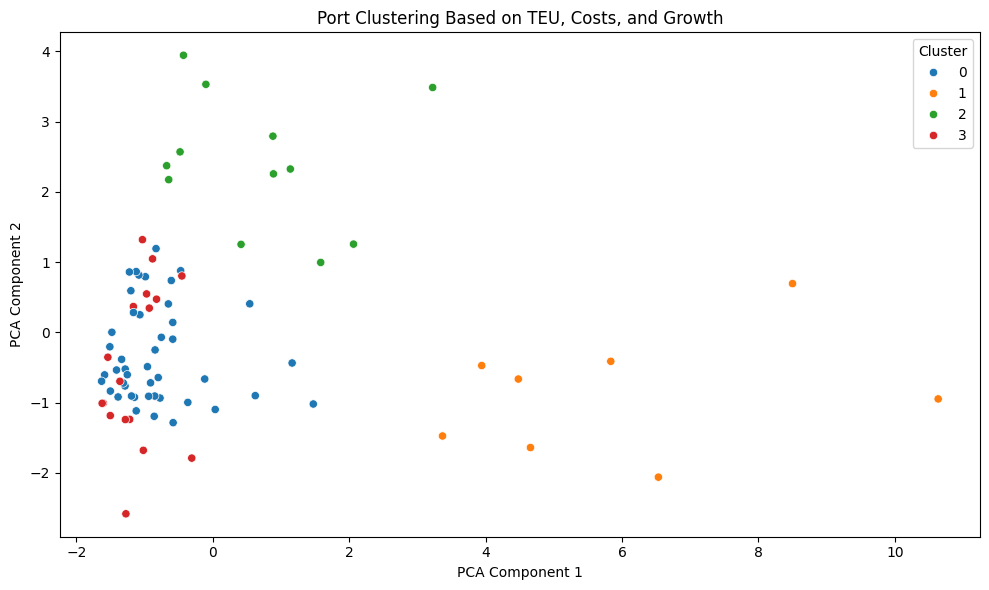

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Port Clustering Based on TEU, Costs, and Growth')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# K-means clustering performance metrics
inertia = kmeans.inertia_
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"K-Means Performance Metrics:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.4f}")

K-Means Performance Metrics:
Inertia: 183.61
Silhouette Score: 0.3561


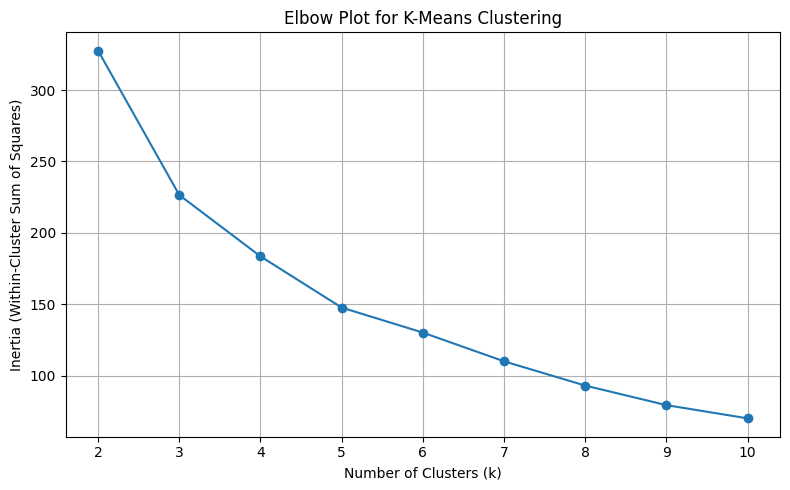

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster counts to evaluate
inertias = []
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

Explained Variance Ratio (per component):
PC1: 0.6497
PC2: 0.2138
PC3: 0.1109
PC4: 0.0241
PC5: 0.0011
PC6: 0.0002
PC7: 0.0001
PC8: 0.0001

Cumulative variance explained by first 2 components: 0.8635 (86.35%)


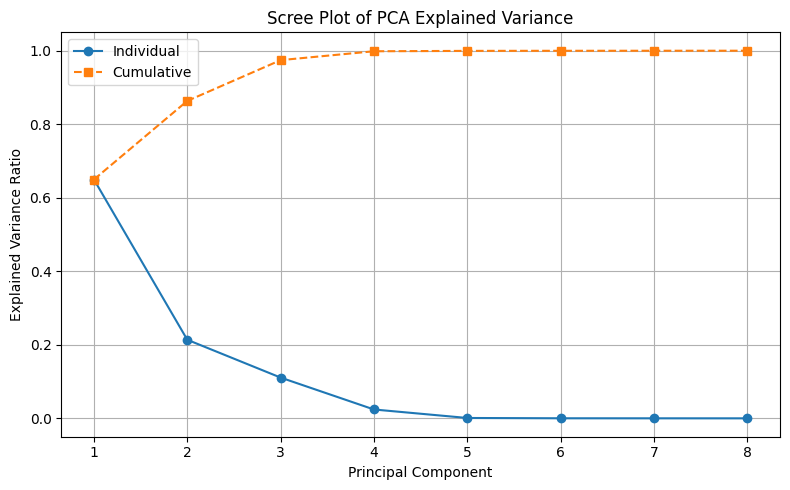

In [ ]:
teu_columns = ['TEU_2020_M', 'TEU_2021_M', 'TEU_2022_M', 'TEU_2023_M', 'TEU_2024_M_est']
df = df.dropna(subset=teu_columns + ['Monthly_Local_Wage_USD', 'Median_Home_Value_USD', 'CAGR'])

features = teu_columns + ['Monthly_Local_Wage_USD', 'Median_Home_Value_USD', 'CAGR']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio (per component):")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

print(f"\nCumulative variance explained by first 2 components: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', linestyle='--', label='Cumulative')
plt.title("Scree Plot of PCA Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

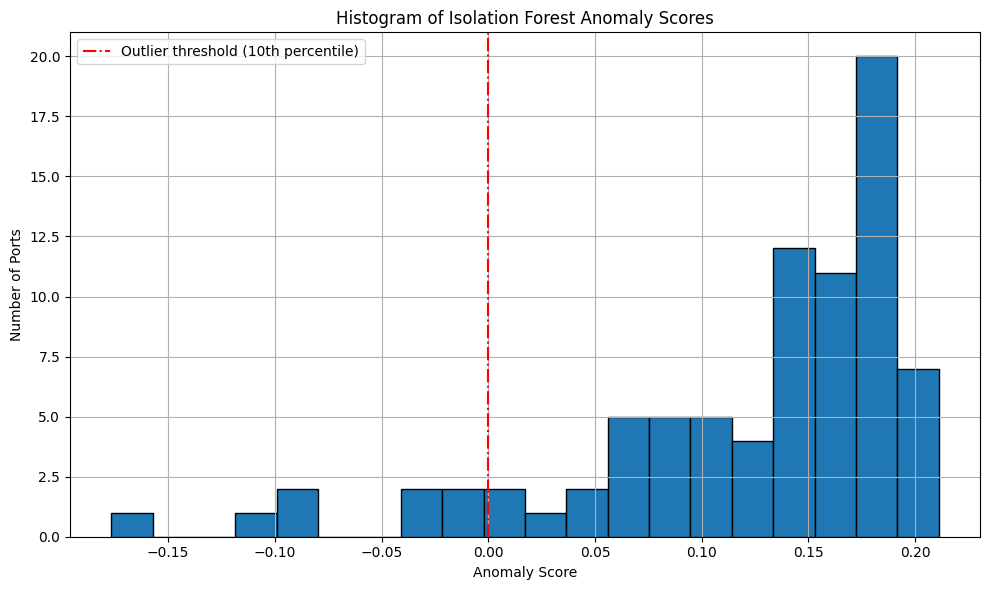

In [ ]:

from sklearn.ensemble import IsolationForest
teu_columns = ['TEU_2020_M', 'TEU_2021_M', 'TEU_2022_M', 'TEU_2023_M', 'TEU_2024_M_est']
features = teu_columns + ['Monthly_Local_Wage_USD', 'Median_Home_Value_USD', 'CAGR']
df = df.dropna(subset=features)
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)
df['Anomaly'] = df['Anomaly'].map({-1: 'Outlier', 1: 'Inlier'})
df['Anomaly_Score'] = iso_forest.decision_function(X_scaled)

plt.figure(figsize=(10, 6))
plt.hist(df['Anomaly_Score'], bins=20, edgecolor='black')
threshold = np.percentile(df['Anomaly_Score'], 10)
plt.axvline(x=threshold, color='red', linestyle='dashdot', label='Outlier threshold (10th percentile)')
plt.title('Histogram of Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Ports')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = df.dropna(subset=teu_columns)
years = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)

slopes = []
r2s = []

for i, row in df.iterrows():
    y = row[teu_columns].values.reshape(-1, 1)
    model = LinearRegression().fit(years, y)
    y_pred = model.predict(years)
    slope = model.coef_[0][0]
    r2 = r2_score(y, y_pred)
    slopes.append(slope)
    r2s.append(r2)

df['TEU_Trend_Slope'] = slopes
df['Trend_R2'] = r2s

# Classify trends based on slope
df['Trend_Type'] = pd.cut(df['TEU_Trend_Slope'],
                          bins=[-np.inf, 0, 0.5, 1.5, np.inf],
                          labels=['Declining', 'Flat', 'Moderate Growth', 'Accelerating'])

summary = df['Trend_Type'].value_counts().to_string()
avg_r2 = df['Trend_R2'].mean()
print("Trend Classification Counts:")
print(summary)
print(f"\nAverage R² across ports: {avg_r2:.4f}")

Trend Classification Counts:
Trend_Type
Flat               57
Declining          15
Moderate Growth     7
Accelerating        3

Average R² across ports: 0.6867


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df = df.dropna(subset=teu_columns)

years = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
r2s = []

for _, row in df.iterrows():
    y = row[teu_columns].values
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(years)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2s.append(r2_score(y, y_pred))

print(f"Polynomial Regression (Quadratic)\nAverage R²: {np.mean(r2s):.4f}")

Polynomial Regression (Quadratic)
Average R²: 0.7724


In [ ]:
df = df.dropna(subset=teu_columns)

r2s = []

for _, row in df.iterrows():
    y = row[teu_columns].values
    x1, x2 = np.array([2020, 2021, 2022]).reshape(-1, 1), np.array([2022, 2023, 2024]).reshape(-1, 1)
    y1, y2 = y[:3], y[2:]
    model1 = LinearRegression().fit(x1, y1)
    model2 = LinearRegression().fit(x2, y2)
    y1_pred = model1.predict(x1)
    y2_pred = model2.predict(x2)
    y_comb = np.concatenate([y1, y2])
    y_pred = np.concatenate([y1_pred, y2_pred])
    r2s.append(r2_score(y_comb, y_pred))

print(f"Piecewise Linear Regression\nAverage R²: {np.mean(r2s):.4f}")

Piecewise Linear Regression
Average R²: 0.8098


In [ ]:
from scipy.interpolate import UnivariateSpline
df = df.dropna(subset=teu_columns)

x = np.array([2020, 2021, 2022, 2023, 2024])
r2s = []

for _, row in df.iterrows():
    y = row[teu_columns].values
    spline = UnivariateSpline(x, y, k=3, s=0)
    y_pred = spline(x)
    r2s.append(r2_score(y, y_pred))

print(f"Spline Regression\nAverage R²: {np.mean(r2s):.4f}")

Spline Regression
Average R²: 1.0000


In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df = df.dropna(subset=teu_columns)

x = np.array([2020, 2021, 2022, 2023, 2024])
r2s = []

for _, row in df.iterrows():
    y = row[teu_columns].values
    smoothed = lowess(y, x, frac=0.6, return_sorted=False)
    r2s.append(r2_score(y, smoothed))

print(f"LOESS (Local Regression)\nAverage R²: {np.mean(r2s):.4f}")

LOESS (Local Regression)
Average R²: 1.0000


In [ ]:
df

,Rank,Country,Port_Name,TEU_2020_M,TEU_2021_M,TEU_2022_M,TEU_2023_M,TEU_2024_M_est,Monthly_Local_Wage_USD,Median_Home_Value_USD,...,Growth__est,Cluster,PCA1,PCA2,Outlier,TEU_Trend_Slope,Trend_Type,Anomaly,Anomaly_Score,Trend_R2
0,1,China,Shanghai,43.500,47.030,47.300,49.16,50.00,1880,872555.0,...,0.017087,1,10.633751,-0.946471,Outlier,1.5130,Accelerating,Outlier,-0.176559,0.907879
1,2,Singapore,Singapore,36.900,37.490,37.290,39.01,40.90,4100,874372.0,...,0.048449,1,8.499065,0.694290,Outlier,0.9520,Moderate Growth,Outlier,-0.115674,0.831572
2,3,China,Ningbo–Zhoushan,28.720,31.070,33.350,35.30,39.30,1400,300000.0,...,0.113314,1,6.532983,-2.059520,Outlier,2.5390,Accelerating,Outlier,-0.081054,0.982038
3,4,China,Shenzhen,26.550,28.770,30.040,29.88,30.70,1700,680283.0,...,0.027443,1,5.835150,-0.411563,Outlier,0.9410,Moderate Growth,Outlier,-0.033946,0.833419
4,5,China,Guangzhou,23.510,24.180,24.860,25.41,25.18,1500,420000.0,...,-0.009052,1,4.480005,-0.663529,Outlier,0.4570,Flat,Outlier,-0.006159,0.862770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,86,China,Haikou,1.970,2.011,2.146,2.20,2.30,750,100000.0,...,0.045455,0,-1.584264,-0.604416,Inlier,0.0849,Flat,Inlier,0.166002,0.977872
81,87,China,Quanzhou,2.260,1.954,2.091,2.20,2.30,900,120000.0,...,0.045455,0,-1.507249,-0.204577,Inlier,0.0326,Flat,Inlier,0.150412,0.135570
82,88,Poland,Gdansk,1.924,2.118,2.072,2.00,2.10,1350,180000.0,...,0.050000,0,-1.477438,0.001979,Inlier,0.0234,Flat,Inlier,0.137854,0.212853
83,89,Turkey,Kocaeli,1.801,1.968,2.059,2.10,2.20,800,90000.0,...,0.047619,0,-1.628063,-0.694946,Inlier,0.0930,Flat,Inlier,0.155108,0.952227



Average R² Comparison by Model:
Linear    : Avg R² = 0.6867, Min = 0.0006, Max = 0.9894
Polynomial: Avg R² = 0.7724, Min = 0.0009, Max = 0.9992
LogLinear : Avg R² = 0.6827, Min = 0.0004, Max = 0.9941
Piecewise : Avg R² = 0.8098, Min = 0.1538, Max = 1.0000
Spline    : Avg R² = 0.9353, Min = 0.2086, Max = 1.0000
LOESS     : Avg R² = 1.0000, Min = 1.0000, Max = 1.0000


<ipython-input-28-5d01b0a1defa>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=r2_df, x="Model", y="R2", palette="Set2")


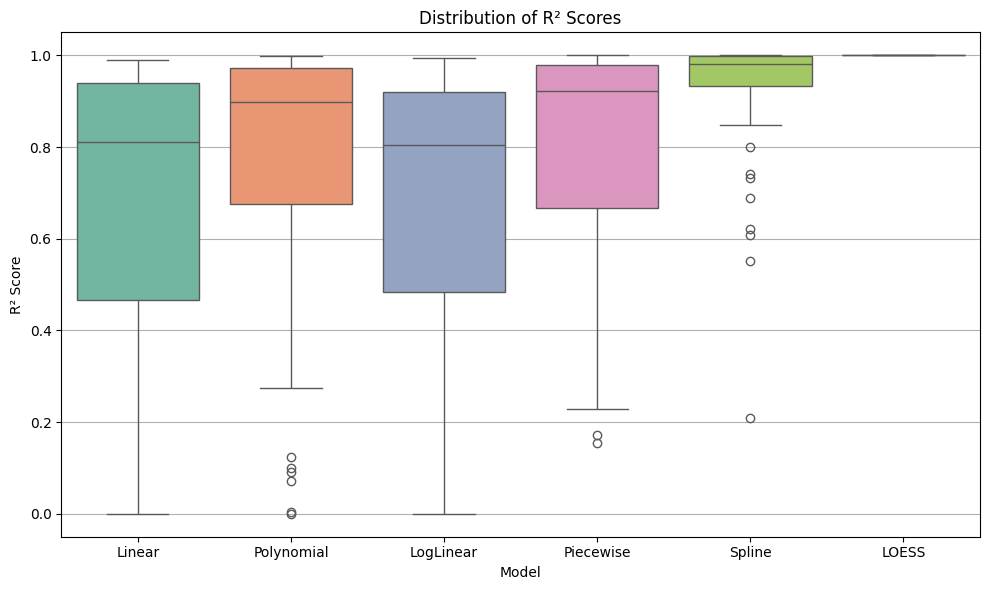

In [ ]:
df = df.dropna(subset=teu_columns)

x = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
x_flat = x.flatten()

results = {
    "Linear": [],
    "Polynomial": [],
    "LogLinear": [],
    "Piecewise": [],
    "Spline": [],
    "LOESS": []
}

for _, row in df.iterrows():
    y = row[teu_columns].values.astype(float)

    # Linear
    model_lin = LinearRegression().fit(x, y)
    results["Linear"].append(r2_score(y, model_lin.predict(x)))

    # Polynomial
    X_poly = PolynomialFeatures(degree=2).fit_transform(x)
    model_poly = LinearRegression().fit(X_poly, y)
    results["Polynomial"].append(r2_score(y, model_poly.predict(X_poly)))

    # Log-Linear (safe transform)
    if np.all(y > 0):
        y_log = np.log(y)
        model_log = LinearRegression().fit(x, y_log)
        results["LogLinear"].append(r2_score(y_log, model_log.predict(x)))
    else:
        results["LogLinear"].append(np.nan)

    # Piecewise
    x1, x2 = x_flat[:3].reshape(-1, 1), x_flat[2:].reshape(-1, 1)
    y1, y2 = y[:3], y[2:]
    model1 = LinearRegression().fit(x1, y1)
    model2 = LinearRegression().fit(x2, y2)
    y_pred_comb = np.concatenate([model1.predict(x1), model2.predict(x2)])
    results["Piecewise"].append(r2_score(np.concatenate([y1, y2]), y_pred_comb))

    # Spline
    spline = UnivariateSpline(x_flat, y, k=3, s=1)
    results["Spline"].append(r2_score(y, spline(x_flat)))

    # LOESS
    y_loess = lowess(y, x_flat, frac=0.6, return_sorted=False)
    results["LOESS"].append(r2_score(y, y_loess))

print("\nAverage R² Comparison by Model:")
for model, scores in results.items():
    valid_scores = [s for s in scores if not np.isnan(s)]
    print(f"{model:10s}: Avg R² = {np.mean(valid_scores):.4f}, Min = {np.min(valid_scores):.4f}, Max = {np.max(valid_scores):.4f}")

r2_df = pd.DataFrame([(model, score) for model, scores in results.items() for score in scores if not np.isnan(score)], columns=["Model", "R2"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=r2_df, x="Model", y="R2", palette="Set2")
plt.title("Distribution of R² Scores")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()